# Valeur moyenne des lancés de pièces sur une ligne à 3m

## Preprocessing

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("akinatorIA3F3.csv")
type(df)

pandas.core.frame.DataFrame

In [28]:
cols = df.columns[1:].to_list()

In [29]:
df = df[cols].applymap(str)
dftot = df.unstack().str.replace(",",".")

In [30]:
dftot = dftot.astype(float)

In [31]:
dftot.isna().unique()

array([False])

In [32]:
dftot = pd.DataFrame(dftot)

In [33]:
dftot

0
Groupe 1 0   -51.0
         1  -107.0
         2   -59.0
         3   -94.5
         4   -64.0
...            ...
Groupe 7 25   27.0
         26   -1.0
         27  -22.0
         28  135.5
         29   -5.5

[210 rows x 1 columns]

 ## Plot de la distribution
     
     Une distribution normale est paramétrée par sa moyenne est son écart type
     

(array([ 1.,  1.,  2.,  2.,  8., 10., 13., 21., 32., 30., 24., 27., 10.,
         8., 10.,  2.,  1.,  5.,  1.,  2.]),
 array([-160.  , -143.05, -126.1 , -109.15,  -92.2 ,  -75.25,  -58.3 ,
         -41.35,  -24.4 ,   -7.45,    9.5 ,   26.45,   43.4 ,   60.35,
          77.3 ,   94.25,  111.2 ,  128.15,  145.1 ,  162.05,  179.  ]),
 <BarContainer object of 20 artists>)

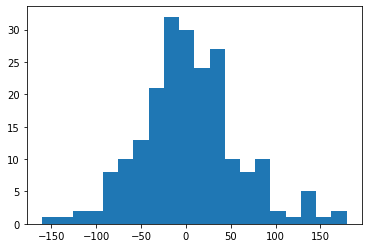

In [34]:
plt.hist(dftot, bins=20)

## Moyenne et et écart type de l'echantillon

### Moyenne

In [35]:
dftot.sum() / len(dftot)

0    3.968095
dtype: float64

In [36]:
dftot.mean()

0    3.968095
dtype: float64

### Ecart type

In [37]:
dftot.std()

0    55.618435
dtype: float64

In [38]:
np.sqrt(((dftot - dftot.mean())**2).sum()/(len(dftot) - 1))

0    55.618435
dtype: float64

## Intervalles de confiance
<img src="https://openelectiondata.net/assets/images/academy/a-gentle-introduction-to-summarizing-data/image6.png">

In [39]:
np.array(dftot).mean()

3.9680952380952377

In [45]:
f"Les lancés sont centrés autour de {round(np.array(dftot).mean(), 2)} cm +- {round(dftot[0].std() * 2, 2)} cm  dans un intervalle de confiance de 95%"

'Les lancés sont centrés autour de 3.97 cm +- 111.24 cm  dans un intervalle de confiance de 95%'

## La standard Error
Issue du théoreme central au limites

In [50]:
ste = dftot.std() / np.sqrt(len(dftot))
ste

0    3.838037
dtype: float64

In [53]:
f"La moyenne des lancés de la population totale est de {round(np.array(dftot).mean(), 2)} cm +- {round(float(ste) * 2, 2)} cm  dans un intervalle de confiance de 95%"

'La moyenne des lancés de la population totale est de 3.97 cm +- 7.68 cm  dans un intervalle de confiance de 95%'